# Entwicklung der Kindersterblichkeitsrate 
Gruppe: Ajna Aliji und Melisa Dedukic


Fragen:
1. Wie hat sich die Kindersterblichkeitsrate weltweit über die Jahrzente entwickelt?
2. Welche Länder haben derzeit die höchste bzw. niedrigste Kindersterblichkeitsrate?
3. Wie unterscheiden sich die Kindersterblichkeitsraten zwischen einkommensstarken und einkommensschwachen Ländern? 
4. Bei welchen Ländern, stagniert bzw. Steigt die Kindersterblichkeitrate?
5. Welche Regionen zeigen den grössten Rückgang in der Kindersterblichkeits?

Quellen:
- https://childmortality.org/all-cause-mortality/data
- https://www.gapminder.org/data/documentation/gd005/  
- https://ourworldindata.org/population-sources 






## 1. Daten beschaffen und laden

In [261]:
import pandas as pd
from matplotlib import pyplot as plt

In [262]:
# loading the data
df = pd.read_csv('child-mortality.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Unter 5 Sterblichkeitsrate']) 
df.head()

,Gebiet,Code,Jahr,Unter 5 Sterblichkeitsrate
0,Afghanistan,AFG,2014,7.528273
1,Afghanistan,AFG,2015,7.267698
2,Afghanistan,AFG,2016,7.023421
3,Afghanistan,AFG,2017,6.791161
4,Afghanistan,AFG,2018,6.575211


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format, da jede Zeile eine Kombination aus Gebiet, Jahr und Sterblichkeitsrate repräsentiert.
- Für die Analyse werden die Daten ins Wide-Format transformiert: Durch pivotieren werden die Jahre zu Spaltenüberschriften und jede Zeile repräsentiert eine Region. Dies ermöglicht eine übersichtliche Darstellung und den direkten Vergleich der Werte über mehrere Jahre hinweg.
- Das Long-Format eignet sich besonders um die Daten zu filtern, sortieren und für Diagramme nutzen. Das Wide-Format ist dagegen besser, um die Werte zwischen verschiedenen Jahren oder Regionen direkt zu vergleichen.



In [263]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Unter 5 Sterblichkeitsrate')
df_pivot.head()

Jahr,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.815998,7.528273,7.267698,7.023421,6.791161,6.575211,6.361594,6.155799,5.960755,5.767968
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.796442,7.577729,7.376779,7.170871,6.982090,6.792204,6.606280,6.420107,6.232287,6.053605
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.046844,0.992791,0.957540,0.940036,0.933377,0.934290,0.938541,0.942817,0.945740,0.943802
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.604556,2.566788,2.530254,2.491073,2.447241,2.398036,2.346064,2.291044,2.233761,2.175275
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.393545,0.375111,0.355793,0.339233,0.324281,0.311451,0.299068,0.288192,0.278005,0.268771


## 3. Statistik der Roh-Daten (Analyse im Longformat)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Gebiete* enthält 233 verschiedene Gebiete
- Die Spalte *Codes* enthält 203  verschiedene Codes
- Es sind Daten zwischen 1751 und 2022 vorhanden. Ab dem Jahr 1990 sind die Daten komplett.
- Die Unter 5 Sterblichkeitsrate streut zwischen 0,2 und 68 Todesfällen pro 1.000 Lebendgeburten.

In [264]:
df.dtypes

Gebiet                         object
Code                           object
Jahr                            int64
Unter 5 Sterblichkeitsrate    float64
dtype: object

### 3.1 Analyse Gebiete

In [265]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  233


In [266]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Sweden                                       272
Austria                                      213
France                                       207
Belgium                                      189
Denmark                                      188
                                            ... 
Lower-middle-income countries                 33
South-Eastern Asia (SDG)                      33
Southern Asia (SDG)                           33
Sub-Saharan Africa (SDG)                      33
Eastern Asia and South-Eastern Asia (SDG)     33
Name: count, Length: 233, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

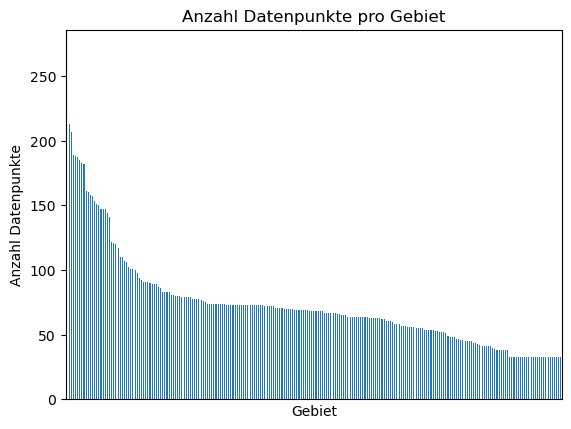

In [267]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [268]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  203


In [269]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
SWE         272
AUT         213
FRA         207
BEL         189
DNK         188
           ... 
AIA          38
SMR          38
AND          38
MCO          38
OWID_WRL     33
Name: count, Length: 202, dtype: int64

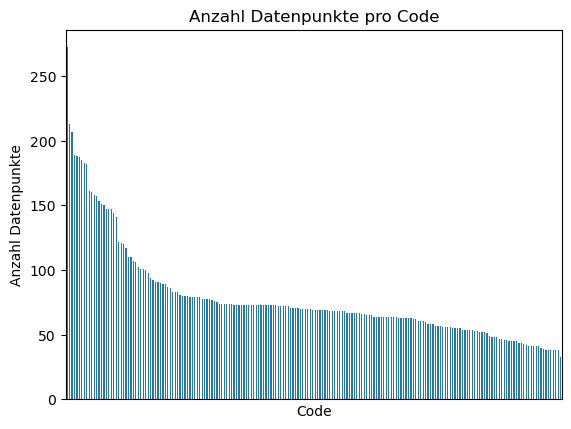

In [270]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [271]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  272


In [272]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1751      1
1752      1
1753      1
1754      1
1755      1
       ... 
2018    232
2019    232
2020    232
2021    232
2022    232
Name: count, Length: 272, dtype: int64

In [273]:
total_countries = len(df['Gebiet'].unique())

years_with_all_countries = df['Jahr'].value_counts()
years_with_all_countries = years_with_all_countries[years_with_all_countries == total_countries]
print("Jahre, in denen alle Länder erfasst wurden:")
print(years_with_all_countries)

Jahre, in denen alle Länder erfasst wurden:
Jahr
2003    233
2002    233
1992    233
1993    233
1994    233
1995    233
1996    233
1997    233
1998    233
1999    233
2000    233
2001    233
1991    233
1990    233
2004    233
2005    233
2006    233
2007    233
2008    233
2009    233
2010    233
Name: count, dtype: int64


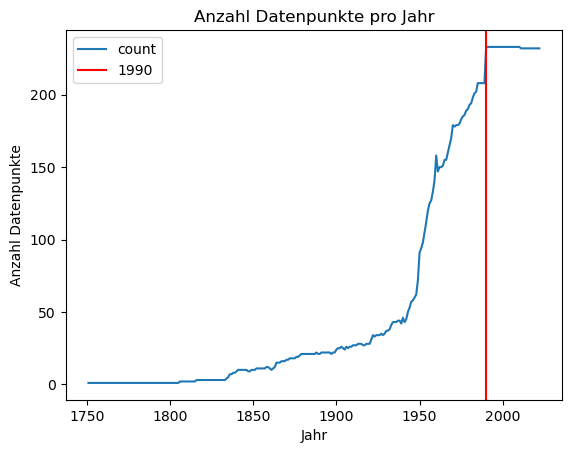

In [274]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1990, color='red',label='1990') # rote Linie bei 1990 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse Lebenserwartung

In [275]:
df.describe()

,Jahr,Unter 5 Sterblichkeitsrate
count,17183.000000,17183.000000
mean,1975.538963,10.386308
std,40.212128,10.398669
min,1751.000000,0.146058
25%,1961.000000,2.173641
50%,1985.000000,6.395330
75%,2004.000000,16.118613
max,2022.000000,68.208000


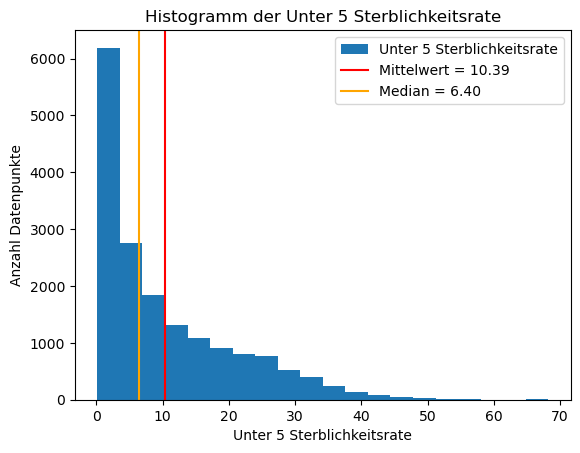

In [276]:
g = df['Unter 5 Sterblichkeitsrate'].plot(kind='hist', bins=20, title='Histogramm der Unter 5 Sterblichkeitsrate', 
                           xlabel='Unter 5 Sterblichkeitsrate', ylabel='Anzahl Datenpunkte')
mean = df['Unter 5 Sterblichkeitsrate'].mean()
g.axvline(x=df['Unter 5 Sterblichkeitsrate'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Unter 5 Sterblichkeitsrate'].median()
g.axvline(x=df['Unter 5 Sterblichkeitsrate'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()


## 4. Analyse 

- https://de.wikipedia.org/wiki/Ebolafieber-Epidemie_2014_bis_2016
- https://www.who.int/emergencies/situations/ebola-outbreak-2014-2016-West-Africa
- https://somalilandsun.com/somaliland-essential-health-services-package-ephs-report/

### Vorgehen

### Beobachtungen

- ...

### Interpretation
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### Berechnungen

In [277]:
diffs = df_pivot[2022]-df_pivot[2012]   # Differenz zwischen 2022 und 2012
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Gebiet
Sierra Leone   -4.675695
Somalia        -4.010715
Angola         -3.737656
Chad           -3.686804
Burkina Faso   -3.314599
                  ...   
Palau           0.265259
Lebanon         0.502895
Venezuela       0.676667
Fiji            0.701049
Dominica        0.754504
Length: 232, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Lebenserwartung 2011-2021'}, ylabel='Gebiet'>

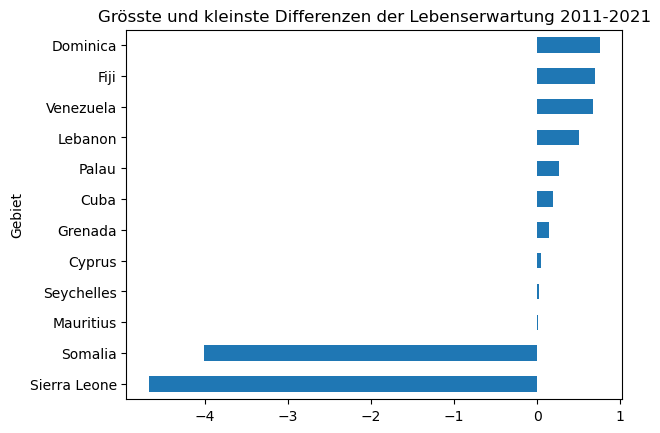

In [278]:
diff_sel = (diffs < -4) | (diffs > 0)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Lebenserwartung 2011-2021')

In [279]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Sierra Leone', 'Somalia', 'Mauritius', 'Seychelles', 'Cyprus', 'Grenada', 'Cuba', 'Palau', 'Lebanon', 'Venezuela', 'Fiji', 'Dominica']


### Visualisierung

Text(2006.5, 35, 'EPHS durch UNICEF')

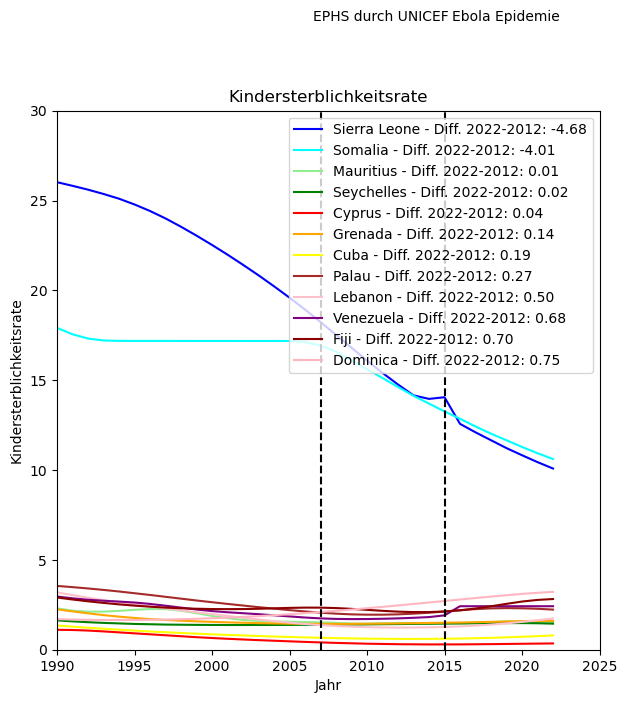

In [280]:
color_dict = {
    'Sierra Leone': 'blue',
    'Somalia': 'cyan',
    'Mauritius': 'lightgreen',
    'Seychelles': 'green',
    'Cyprus': 'red',
    'Grenada': 'orange',
    'Cuba': 'yellow',
    'Palau': 'brown',
    'Lebanon': 'pink',
    'Venezuela': 'purple',
    'Fiji': 'darkred',
    'Dominica': 'lightpink'
    
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title="Kindersterblichkeitsrate", xlabel="Jahr", ylabel=f"Kindersterblichkeitsrate", legend=True,
                                  label=f"{gebiet} - Diff. 2022-2012: {diff:.2f}", # für die Legende
                                  xlim=[1990,2025], ylim=[0,30],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots

# Covid Pandemie    
g.axvline(x=2015, color='black', linestyle='--') 
g.text(2015.5, 35, 'Ebola Epidemie')  

# globale Massnahmen gegen Hungerkriesen
g.axvline(x=2007, color='black', linestyle='--')  
g.text(2006.5, 35, 'EPHS durch UNICEF')

### 5. Wie hat sich die Kindersterblichkeitsrate weltweit über die Jahrzente entwickelt?
- Die Analysierung zeigt mehrheitlich eine Senkung der Kindersterblichkeit über die Jahrzehnte, jedoch hat es die ersten 100 Jahren am Anfang leichte Schwankungen.
- Ab 1940 hat die Kindersterblichkeit kontinuierlich abgenommen.
- Im Jahr 1770 war die Kindersterblichkeitsrate am höchsten.
- Im Jahr 2020 war die Kindersterblichkeitsrate am tiefsten.

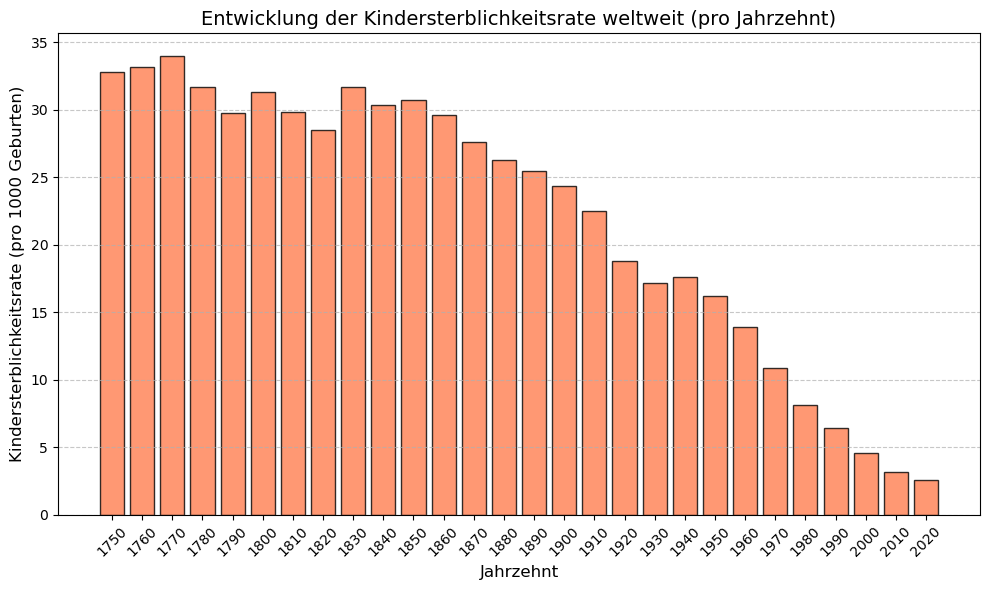

In [281]:
# Neue Spalte "Decade" hinzufügen (Jahrzehnte)
df['Decade'] = (df['Jahr'] // 10) * 10

# Kindersterblichkeitsrate pro Jahrzehnt berechnen
decade_avg = df.groupby('Decade')['Unter 5 Sterblichkeitsrate'].mean()

# Diagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(decade_avg.index, decade_avg.values, width=8, color='coral', edgecolor='black', alpha=0.8)

# Diagramm anpassen
plt.title('Entwicklung der Kindersterblichkeitsrate weltweit (pro Jahrzehnt)', fontsize=14)
plt.xlabel('Jahrzehnt', fontsize=12)
plt.ylabel('Kindersterblichkeitsrate (pro 1000 Geburten)', fontsize=12)
plt.xticks(decade_avg.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


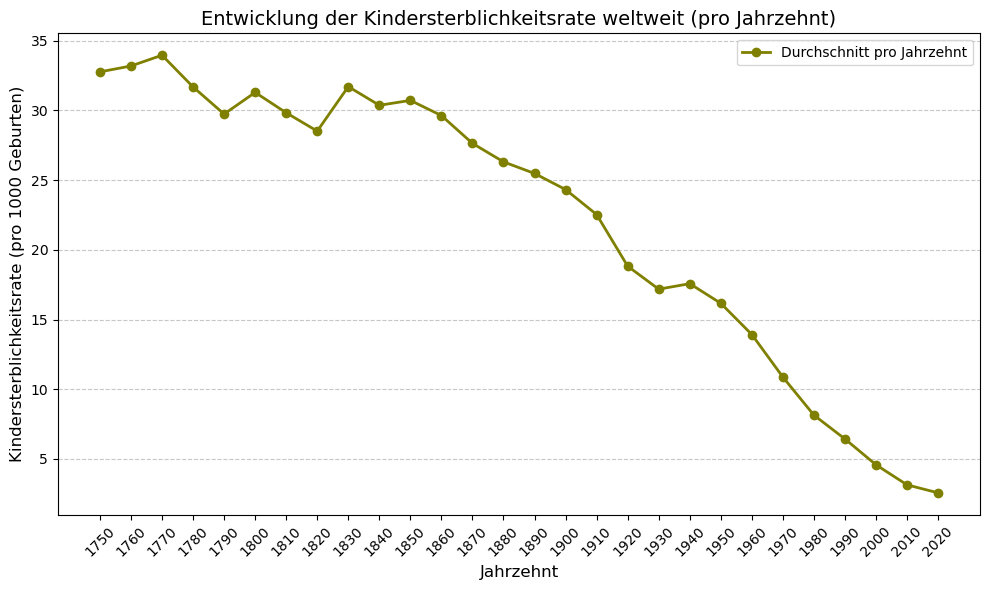

In [282]:
# Neue Spalte "Decade" hinzufügen (Jahrzehnte)
df['Decade'] = (df['Jahr'] // 10) * 10

# Kindersterblichkeitsrate pro Jahrzehnt berechnen
decade_avg = df.groupby('Decade')['Unter 5 Sterblichkeitsrate'].mean()

# Liniendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.plot(decade_avg.index, decade_avg.values, marker='o', color='olive', linestyle='-', linewidth=2, label='Durchschnitt pro Jahrzehnt')

# Diagramm anpassen
plt.title('Entwicklung der Kindersterblichkeitsrate weltweit (pro Jahrzehnt)', fontsize=14)
plt.xlabel('Jahrzehnt', fontsize=12)
plt.ylabel('Kindersterblichkeitsrate (pro 1000 Geburten)', fontsize=12)
plt.xticks(decade_avg.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Diagramm anzeigen
plt.show()

### 6. Welche Länder haben die höchste bzw. niedrigste Kindersterblichkeitsrate im Jahr 2022?
- San Marino, Estonia, Singapore, Norway und Japan haben die niedrigste Sterblichkeitsrate im Jahr 2022
- Niger, Nigeria, Somalia, Chad und Sierra Leone haben die höchste Sterblichkeitsrate im Jahr 2022
- Das Land mit der höchsten Kindersterblichkeitsrate ist Niger und mit der tiefsten ist San Marino.
- San Marino sind es ca. 0.1 Todesfällen pro 1.000 Lebendgeburten im Jahr 2022.
- Niger sind es ca. 11.7 Todesfällen pro 1.000 Lebendgeburten im Jahr 2022.


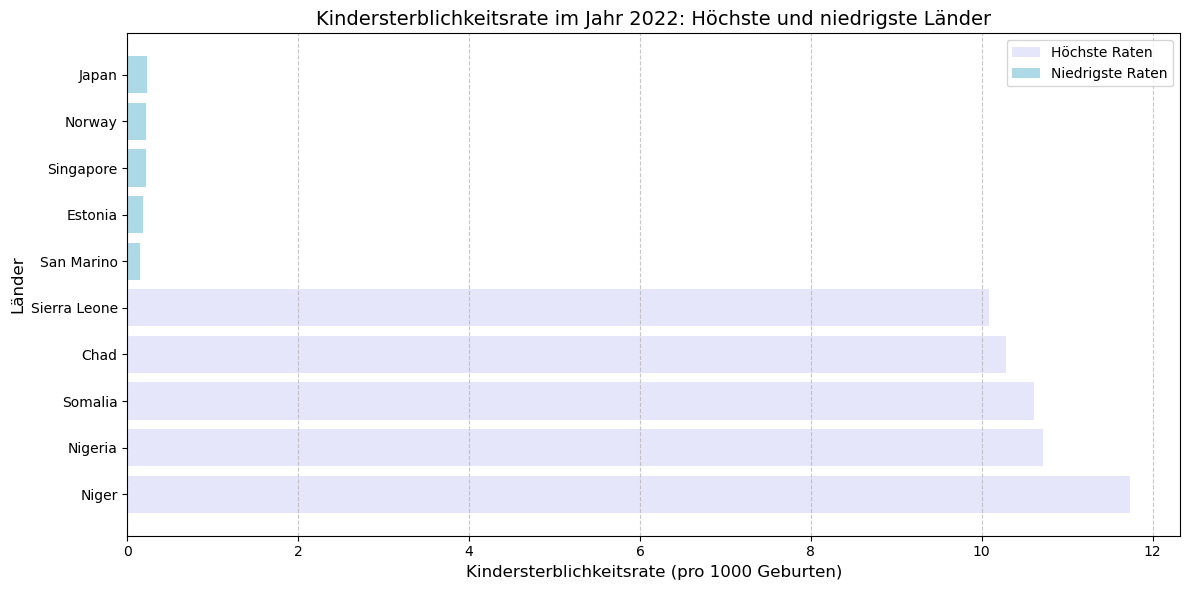

Länder mit der höchsten Kindersterblichkeitsrate im Jahr 2022:
             Gebiet  Unter 5 Sterblichkeitsrate
10950         Niger                   11.734437
11008       Nigeria                   10.717279
13985       Somalia                   10.613298
2981           Chad                   10.285629
13596  Sierra Leone                   10.084661

Länder mit der niedrigsten Kindersterblichkeitsrate im Jahr 2022:
           Gebiet  Unter 5 Sterblichkeitsrate
13225  San Marino                    0.146058
4774      Estonia                    0.188061
13685   Singapore                    0.215215
11551      Norway                    0.216749
7923        Japan                    0.227614


In [283]:
# Daten des neuesten Jahres extrahieren
latest_year = int(df['Jahr'].max())
latest_data = df[df['Jahr'] == latest_year]

# Länder mit der höchsten und niedrigsten Kindersterblichkeitsrate
highest_mortality = latest_data.nlargest(5, 'Unter 5 Sterblichkeitsrate')  # Top 5 mit höchster Rate
lowest_mortality = latest_data.nsmallest(5, 'Unter 5 Sterblichkeitsrate')  # Top 5 mit niedrigster Rate

# Daten für die Visualisierung vorbereiten
highest_data = highest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']]
lowest_data = lowest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']]

# Visualisierung: Balkendiagramm
plt.figure(figsize=(12, 6))

# Balken für höchste Kindersterblichkeitsraten
plt.barh(highest_data['Gebiet'], highest_data['Unter 5 Sterblichkeitsrate'], color='lavender', label='Höchste Raten')

# Balken für niedrigste Kindersterblichkeitsraten
plt.barh(lowest_data['Gebiet'], lowest_data['Unter 5 Sterblichkeitsrate'], color='lightblue', label='Niedrigste Raten')

# Diagramm anpassen
plt.title(f'Kindersterblichkeitsrate im Jahr {latest_year}: Höchste und niedrigste Länder', fontsize=14)
plt.xlabel('Kindersterblichkeitsrate (pro 1000 Geburten)', fontsize=12)
plt.ylabel('Länder', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Länder mit der höchsten Kindersterblichkeitsrate im Jahr {latest_year}:")
print(highest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']])

print(f"\nLänder mit der niedrigsten Kindersterblichkeitsrate im Jahr {latest_year}:")
print(lowest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']])

### 7. Wie unterscheiden sich die Kindersterblichkeitsraten zwischen einkommensstarken und einkommensschwachen Ländern?

### 8. Bei welchen Ländern, stagniert bzw. Steigt die Kindersterblichkeitrate?

### 9. Welche Regionen zeigen den grössten bzw. schwächsten Rückgang in der Kindersterblichkeits?

- Die Visualisierung zeigt, das Barbados den stärksten Rückgang der Kindersterblichkeitsrate hat. 
- San Mariono hat den schwächsten Rückgang der Kindersterblichkeitsrate.
- Barbados sind es 67 Todesfälle pro 1.000 Lebendgeburten.
- San Marino sind es 1.9 Todesfälle pro 1.000 Lebendgeburten.

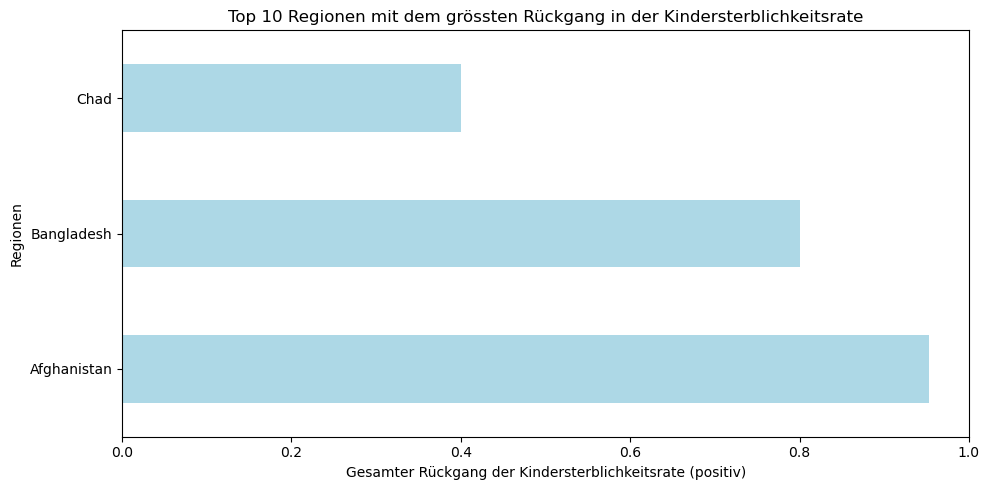

In [284]:
# Berechnung des jährlichen Rückgangs
df_sorted['Change'] = df_sorted.groupby('Gebiet')['Unter 5 Sterblichkeitsrate'].diff()

# Summieren des gesamten Rückgangs (und Umwandlung in positive Werte)
total_decline = df_sorted.groupby('Gebiet')['Change'].sum()
total_decline = total_decline[total_decline < 0].abs().sort_values(ascending=False)

# Auswahl der Top 10 Regionen mit dem grössten Rückgang
top10_decline = total_decline.head(10)

# Visualisierung: Balkendiagramm mit positiven Werten
plt.figure(figsize=(10, 5))
top10_decline.plot(kind='barh', color='lightblue')
plt.title('Top 10 Regionen mit dem grössten Rückgang in der Kindersterblichkeitsrate')
plt.xlabel('Gesamter Rückgang der Kindersterblichkeitsrate (positiv)')
plt.ylabel('Regionen')
plt.tight_layout()
plt.show()

In [285]:
# Top 10 Regionen anzeigen
print("Top 10 Regionen mit dem grössten Rückgang in der Kindersterblichkeitsrate:")
print(top10_decline)

Top 10 Regionen mit dem grössten Rückgang in der Kindersterblichkeitsrate:
Gebiet
Afghanistan    0.953062
Bangladesh     0.800000
Chad           0.400000
Name: Change, dtype: float64


### 11. Ausreisser und besondere Trends